## Project Machine Learning For Big Data

### Pranay Gheewala - B00826923

### Karan Thakkar - B00823819

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import zipfile
import numpy as np
import os
import pandas as pd 
import string
import xml.etree.ElementTree as et
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.cm as cm
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import nltk
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import davies_bouldin_score 
from keras import utils

## Extracting Data from the folder. We have used all the data provided for the project. 

In [76]:
#Data extraction path
directory = 'C:\\Users\\Pranay\\Desktop\\dalhousie\\Machine Learning for Big Data\\Project\\Data\\Data'

df_cols = ["itemid","headline","text","date","XMLfilename","bip"]
rows = []

# function for extracting data from xml file
def createDataFrame (xml_file):

    xtree = et.parse(directory+'\\'+filename+'\\'+xml_file)
    xroot = xtree.getroot()  
    itemid= xroot.attrib.get("itemid")
    
    for headline in xroot.iter('headline'):
        news_headline = headline.text
    
    text=xroot.find("text")
    textData = ''
    for pTag in text.findall('./p'):
        textData = textData + pTag.text
    
    dateData=''
    date=xroot.find("metadata")
    for dateTag in date.findall('./dc'):
        if dateTag.attrib.get("element")=='dc.date.published':
            dateData = dateTag.attrib.get("value")
    
    bipData=''
    bip=xroot.find("metadata")
    for bipTag in bip.findall('./codes'):
        if bipTag.attrib.get("class")=='bip:topics:1.0':
            for bipcode in bipTag.findall('./code'):
                bipData = bipData+ bipcode.attrib.get("code")
                break

    rows.append({"itemid": itemid,"headline": news_headline,"text" : textData, "date" : dateData, "XMLfilename" : xml_file, "bip" : bipData})

    return rows    

for filename in os.listdir(directory):
    
    for name in os.listdir(directory+'\\'+filename):
       
        if name.endswith('.xml'):
                
                row_data=createDataFrame(name)
                
doc_df = pd.DataFrame(row_data,columns = df_cols) #creating dataframe                           
doc_df.head()

 

,itemid,headline,text,date,XMLfilename,bip
0,432107,"Detroit gunman killed after he kills 3, wounds 2.",Reciting the Lord's Prayer while he fired a sh...,1997-03-11,432107newsML.xml,GCAT
1,432108,COMMISSION ADOPTS MEMORANDUM ON WORKERS RIGHTS...,"The Commission, in paragraph 11.3.2 of the Med...",1997-03-11,432108newsML.xml,E41
2,432109,REUTER EC REPORT LONG-TERM DIARY (PAGE 6/10 - ...,EC Report Long-Term Diary (page 7/10 - June 11...,1997-03-11,432109newsML.xml,G15
3,432110,REUTER EC REPORT LONG-TERM DIARY (PAGE 2/10 - ...,EC Report Long-Term Diary (page 4/10 - Apr 24-...,1997-03-11,432110newsML.xml,G15
4,432111,REUTER EC REPORT LONG-TERM DIARY FOR MARCH 17-...,****HIGHLIGHTS****AMSTERDAM - The Netherlands ...,1997-03-11,432111newsML.xml,G15


## Preprocessing Text

## 1.) Cleaning Data. Removing punctuation, digits and special characters.

In [77]:
# function to clean data using regular expression
def cleanData (dataframe):
    # removing punctuation
    dataframe['text']=dataframe['text'].str.replace('[{}]'.format(string.punctuation), '')
    
    #converting all text data to lower case
    dataframe["text"] = dataframe["text"].str.lower()
    
    #removing digits from text data
    dataframe["text"] = dataframe["text"].str.replace(r"[^a-z]+"," ")
    
    return dataframe

cleanData(doc_df)

,itemid,headline,text,date,XMLfilename,bip
0,432107,"Detroit gunman killed after he kills 3, wounds 2.",reciting the lords prayer while he fired a sho...,1997-03-11,432107newsML.xml,GCAT
1,432108,COMMISSION ADOPTS MEMORANDUM ON WORKERS RIGHTS...,the commission in paragraph of the mediumterm ...,1997-03-11,432108newsML.xml,E41
2,432109,REUTER EC REPORT LONG-TERM DIARY (PAGE 6/10 - ...,ec report longterm diary page june wednesday m...,1997-03-11,432109newsML.xml,G15
3,432110,REUTER EC REPORT LONG-TERM DIARY (PAGE 2/10 - ...,ec report longterm diary page apr may thursday...,1997-03-11,432110newsML.xml,G15
4,432111,REUTER EC REPORT LONG-TERM DIARY FOR MARCH 17-...,highlightsamsterdam the netherlands hosts summ...,1997-03-11,432111newsML.xml,G15
5,432112,OFFICIAL JOURNAL CONTENTS - OJ C 75 OF MARCH 1...,note contents are displayed in reverse order t...,1997-03-11,432112newsML.xml,G15
6,432113,OFFICIAL JOURNAL CONTENTS - OJ C 76 OF MARCH 1...,note contents are displayed in reverse order t...,1997-03-11,432113newsML.xml,G15
7,432114,"Canada T-bill auction averages, historical rates.",mo mo yr brate c yr can dlr tse note on febru...,1997-03-11,432114newsML.xml,M12
8,432115,Canadian key economic indicators.,indicator period latest prev prev nextunemploy...,1997-03-11,432115newsML.xml,E71
9,432116,RESEARCH ALERT - Goldman starts Canadian oils.,goldman sachs said it initiated coverage of s...,1997-03-11,432116newsML.xml,C15


## 2.) Removing Stop Words

In [78]:
# function to remove stopwords
def removeStopWords(dataframe):
    
    dataframe['text']=dataframe['text'].str.split()
    stop_words = stopwords.words('english')
    dataframe['text']=dataframe['text'].apply(lambda x: [item for item in x if item not in stop_words])
    return dataframe

removeStopWords(doc_df)

,itemid,headline,text,date,XMLfilename,bip
0,432107,"Detroit gunman killed after he kills 3, wounds 2.","[reciting, lords, prayer, fired, shotgun, man,...",1997-03-11,432107newsML.xml,GCAT
1,432108,COMMISSION ADOPTS MEMORANDUM ON WORKERS RIGHTS...,"[commission, paragraph, mediumterm, social, ac...",1997-03-11,432108newsML.xml,E41
2,432109,REUTER EC REPORT LONG-TERM DIARY (PAGE 6/10 - ...,"[ec, report, longterm, diary, page, june, wedn...",1997-03-11,432109newsML.xml,G15
3,432110,REUTER EC REPORT LONG-TERM DIARY (PAGE 2/10 - ...,"[ec, report, longterm, diary, page, apr, may, ...",1997-03-11,432110newsML.xml,G15
4,432111,REUTER EC REPORT LONG-TERM DIARY FOR MARCH 17-...,"[highlightsamsterdam, netherlands, hosts, summ...",1997-03-11,432111newsML.xml,G15
5,432112,OFFICIAL JOURNAL CONTENTS - OJ C 75 OF MARCH 1...,"[note, contents, displayed, reverse, order, pr...",1997-03-11,432112newsML.xml,G15
6,432113,OFFICIAL JOURNAL CONTENTS - OJ C 76 OF MARCH 1...,"[note, contents, displayed, reverse, order, pr...",1997-03-11,432113newsML.xml,G15
7,432114,"Canada T-bill auction averages, historical rates.","[mo, mo, yr, brate, c, yr, dlr, tse, note, feb...",1997-03-11,432114newsML.xml,M12
8,432115,Canadian key economic indicators.,"[indicator, period, latest, prev, prev, nextun...",1997-03-11,432115newsML.xml,E71
9,432116,RESEARCH ALERT - Goldman starts Canadian oils.,"[goldman, sachs, said, initiated, coverage, su...",1997-03-11,432116newsML.xml,C15


## 3.) Applying Stemmer to reduce words to their root word or to chop off the derivational affixes.

In [79]:
#funtion to apply stemming to text data 
def applyStemming(dataframe):
    ps = PorterStemmer()
    dataframe["text"] = dataframe["text"].apply(lambda x: [ps.stem(y) for y in x])
    return dataframe

applyStemming(doc_df)

,itemid,headline,text,date,XMLfilename,bip
0,432107,"Detroit gunman killed after he kills 3, wounds 2.","[recit, lord, prayer, fire, shotgun, man, dres...",1997-03-11,432107newsML.xml,GCAT
1,432108,COMMISSION ADOPTS MEMORANDUM ON WORKERS RIGHTS...,"[commiss, paragraph, mediumterm, social, actio...",1997-03-11,432108newsML.xml,E41
2,432109,REUTER EC REPORT LONG-TERM DIARY (PAGE 6/10 - ...,"[ec, report, longterm, diari, page, june, wedn...",1997-03-11,432109newsML.xml,G15
3,432110,REUTER EC REPORT LONG-TERM DIARY (PAGE 2/10 - ...,"[ec, report, longterm, diari, page, apr, may, ...",1997-03-11,432110newsML.xml,G15
4,432111,REUTER EC REPORT LONG-TERM DIARY FOR MARCH 17-...,"[highlightsamsterdam, netherland, host, summit...",1997-03-11,432111newsML.xml,G15
5,432112,OFFICIAL JOURNAL CONTENTS - OJ C 75 OF MARCH 1...,"[note, content, display, revers, order, print,...",1997-03-11,432112newsML.xml,G15
6,432113,OFFICIAL JOURNAL CONTENTS - OJ C 76 OF MARCH 1...,"[note, content, display, revers, order, print,...",1997-03-11,432113newsML.xml,G15
7,432114,"Canada T-bill auction averages, historical rates.","[mo, mo, yr, brate, c, yr, dlr, tse, note, feb...",1997-03-11,432114newsML.xml,M12
8,432115,Canadian key economic indicators.,"[indic, period, latest, prev, prev, nextunempl...",1997-03-11,432115newsML.xml,E71
9,432116,RESEARCH ALERT - Goldman starts Canadian oils.,"[goldman, sach, said, initi, coverag, suncor, ...",1997-03-11,432116newsML.xml,C15


## 4.) Applying Lemmatizer to reduce words to their base word, which is linguistically correct lemmas.


In [80]:
#Lemmatizing the dataset to reduce words to their base word, which is linguistically correct lemmas


#function to apply  lemmatizing to the text data
def applyLemmatizing(dataframe):
    lemmatize_data = WordNetLemmatizer()
    dataframe["text"] = dataframe["text"].apply(lambda a: [lemmatize_data.lemmatize(word) for word in a])
    return dataframe

applyLemmatizing(doc_df)

,itemid,headline,text,date,XMLfilename,bip
0,432107,"Detroit gunman killed after he kills 3, wounds 2.","[recit, lord, prayer, fire, shotgun, man, dres...",1997-03-11,432107newsML.xml,GCAT
1,432108,COMMISSION ADOPTS MEMORANDUM ON WORKERS RIGHTS...,"[commiss, paragraph, mediumterm, social, actio...",1997-03-11,432108newsML.xml,E41
2,432109,REUTER EC REPORT LONG-TERM DIARY (PAGE 6/10 - ...,"[ec, report, longterm, diari, page, june, wedn...",1997-03-11,432109newsML.xml,G15
3,432110,REUTER EC REPORT LONG-TERM DIARY (PAGE 2/10 - ...,"[ec, report, longterm, diari, page, apr, may, ...",1997-03-11,432110newsML.xml,G15
4,432111,REUTER EC REPORT LONG-TERM DIARY FOR MARCH 17-...,"[highlightsamsterdam, netherland, host, summit...",1997-03-11,432111newsML.xml,G15
5,432112,OFFICIAL JOURNAL CONTENTS - OJ C 75 OF MARCH 1...,"[note, content, display, revers, order, print,...",1997-03-11,432112newsML.xml,G15
6,432113,OFFICIAL JOURNAL CONTENTS - OJ C 76 OF MARCH 1...,"[note, content, display, revers, order, print,...",1997-03-11,432113newsML.xml,G15
7,432114,"Canada T-bill auction averages, historical rates.","[mo, mo, yr, brate, c, yr, dlr, tse, note, feb...",1997-03-11,432114newsML.xml,M12
8,432115,Canadian key economic indicators.,"[indic, period, latest, prev, prev, nextunempl...",1997-03-11,432115newsML.xml,E71
9,432116,RESEARCH ALERT - Goldman starts Canadian oils.,"[goldman, sach, said, initi, coverag, suncor, ...",1997-03-11,432116newsML.xml,C15


## Extracting Features Using TfidfVectorizer

## We have used TfidfVectorizer as we researched about it and found out that it helps to process text data and set up the vector space model in order to provide a convenient data structure for text categorization [1]. Also according to this paper using TFIDF-based feature selection approach to improve its accuracy [1].

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing


textlist=[]

#function to extract features and labels
def featureslabelsExtraction_1(dataframe):
    
    new_df = dataframe
    new_df=new_df.drop(["itemid","headline","date","XMLfilename"], axis=1) #generating new dataframe consisting features and labels
    
    
    vectorizer = TfidfVectorizer(  
    min_df = 0.01,
    max_df = 0.8,
    stop_words = 'english')
    
    for text in new_df['text']:
        text = ' '.join(text)
        textlist.append(text)
    
    X_train_tfidf = vectorizer.fit_transform(textlist) #extracting features and return term-document matrix.
    
    return X_train_tfidf,vectorizer

X_train_tfidf,vectorizer=featureslabelsExtraction_1(doc_df)

    

## Finding Optimal Value For k(number of clusters to be formed)

## 1.) Elbow Graph 

## We first tried plotting elbow to find optimal value for k but as it can be seen from the graph, it is very ambigous and it is difficult to select optimal value for k from this graph as there is no clear and sharp elbow in the graph that can be considered.

In [62]:
def calculateSSE():
    sse = []
    max_k = 20
    k_rng = range(2, max_k+1, 2)
    for k in k_rng:
        km = KMeans(n_clusters=k,init='k-means++')
        km.fit(X_train_tfidf)
        sse.append(km.inertia_)
        
    return sse



In [63]:
sse = calculateSSE()

In [66]:
def plotElbowGraph(sse):
    max_k = 20
    k_rng = range(2, max_k+1, 2)
    f, ax = plt.subplots(1, 1)
    ax.plot(k_rng, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(k_rng)
    ax.set_xticklabels(k_rng)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')


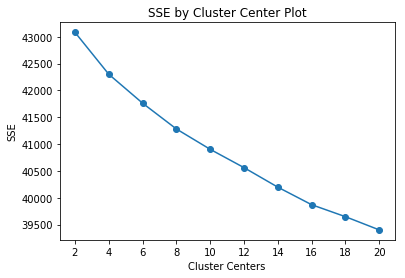

In [67]:
plotElbowGraph(sse)

## 2.) Silhouette Graph   

## We researched to find the alternative for the elbow graph in order to find visual cluster valuation. We found out that Silhouette Graph allows an appreciation of the relative quality of the clusters and an overview of the data configuration [2]. The average silhouette width provides an evaluation of clustering validity, and might be used to select an ‘appropriate’ number of clusters [2].

## Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster [3].

In [106]:
range_n_clusters = [2,4,6,8,10,12,14,16,18,20]

In [73]:
# function to plot silhouette graph to find optimal number for cluster formation
def plotSilhouetteGraph():
    for n_clusters in range_n_clusters:
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_train_tfidf) + (n_clusters + 1) * 10])
        clusterer = KMeans(n_clusters=n_clusters, random_state=10,init='k-means++')
        cluster_labels = clusterer.fit_predict(X_train_tfidf)
        silhouette_avg = silhouette_score(X_train_tfidf, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X_train_tfidf, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()


## As it can be seen from the silhouette score by forming 10 clusters of data gives the highest silhouetter score which indicates the clusters are well formed than other number of clusters and the samples in each cluster are far away from other clusters. Moreover it can be visualize from the graph plot that the thickness of each cluster in n_cluster = 10 is almost uniformly distributed. Also every cluster formed has silhouette score greater than the mean silhouette score which can be observed from the red dotted line.
## Thus we decided to have 10 number of clusters that should be formed for our data.

For n_clusters = 2 The average silhouette_score is : 0.35362674987598636
For n_clusters = 4 The average silhouette_score is : 0.3653895859118908
For n_clusters = 6 The average silhouette_score is : 0.37189850744137426
For n_clusters = 8 The average silhouette_score is : 0.4213590155488445
For n_clusters = 10 The average silhouette_score is : 0.4882782239819362
For n_clusters = 12 The average silhouette_score is : 0.3751566140887957
For n_clusters = 14 The average silhouette_score is : 0.35103845310238234
For n_clusters = 16 The average silhouette_score is : 0.3404261731014825
For n_clusters = 18 The average silhouette_score is : 0.3379405464954568
For n_clusters = 20 The average silhouette_score is : 0.3376210271746718


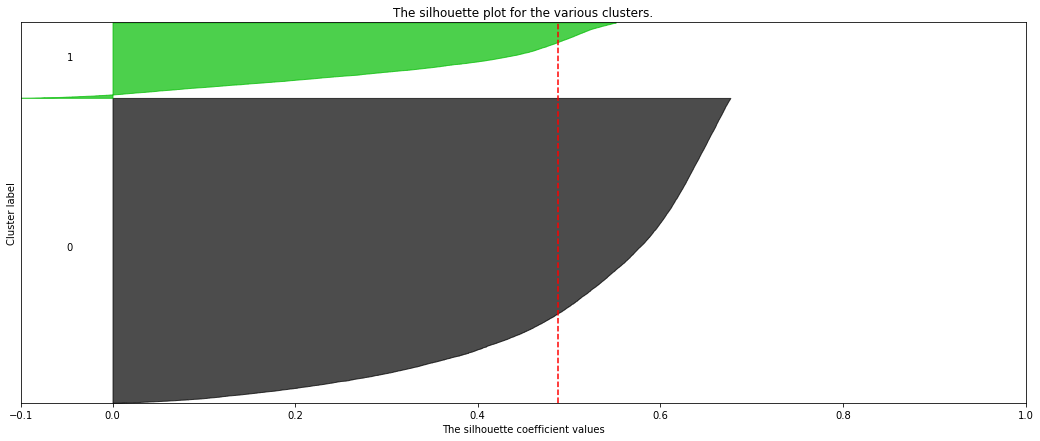

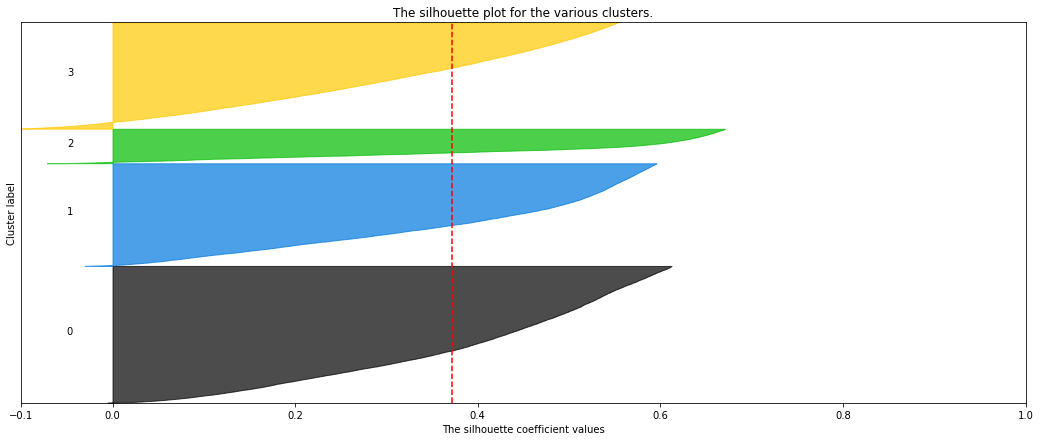

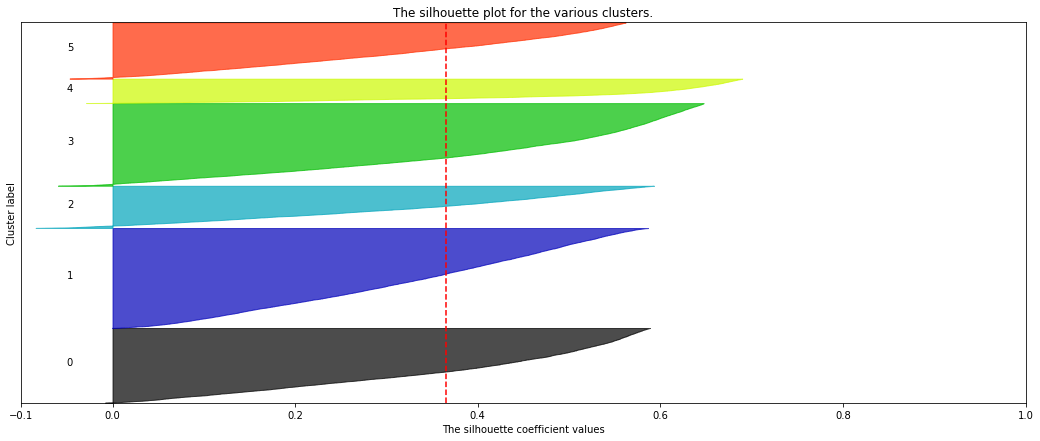

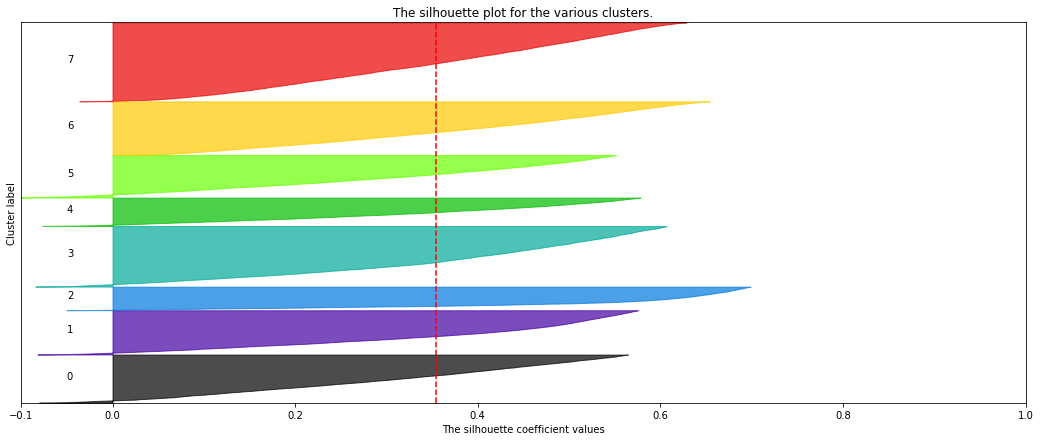

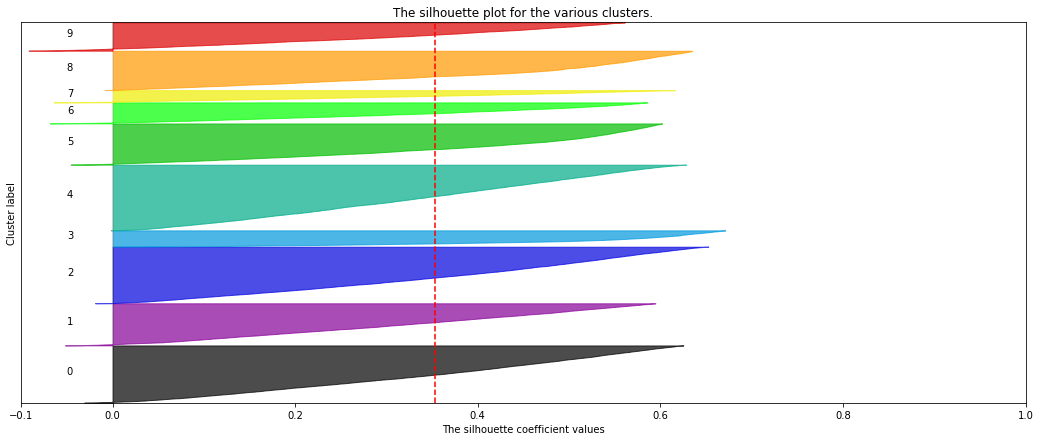

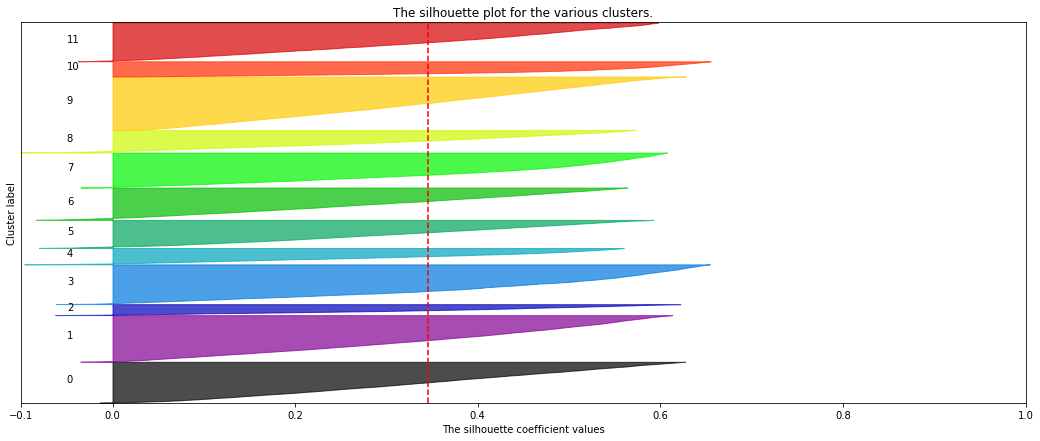

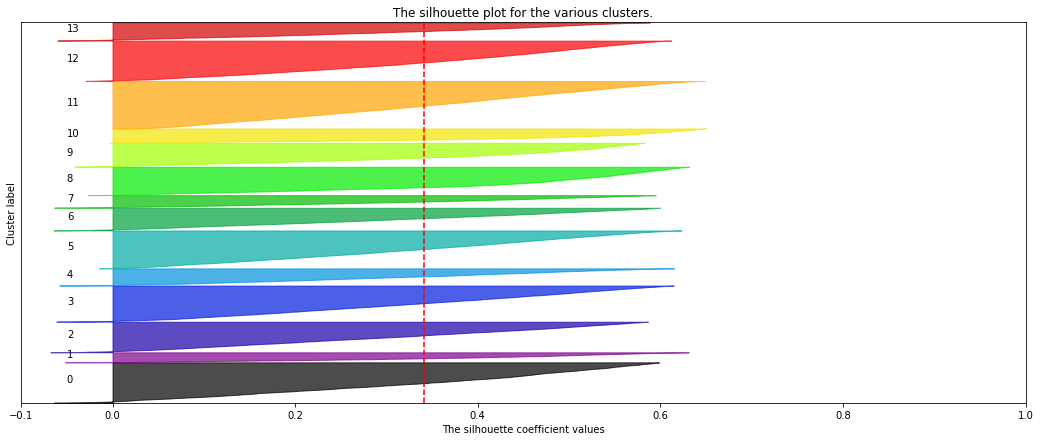

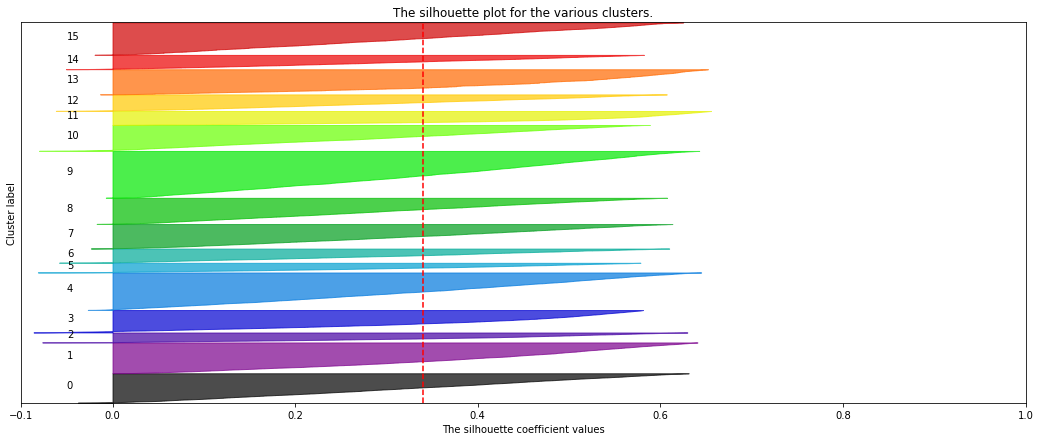

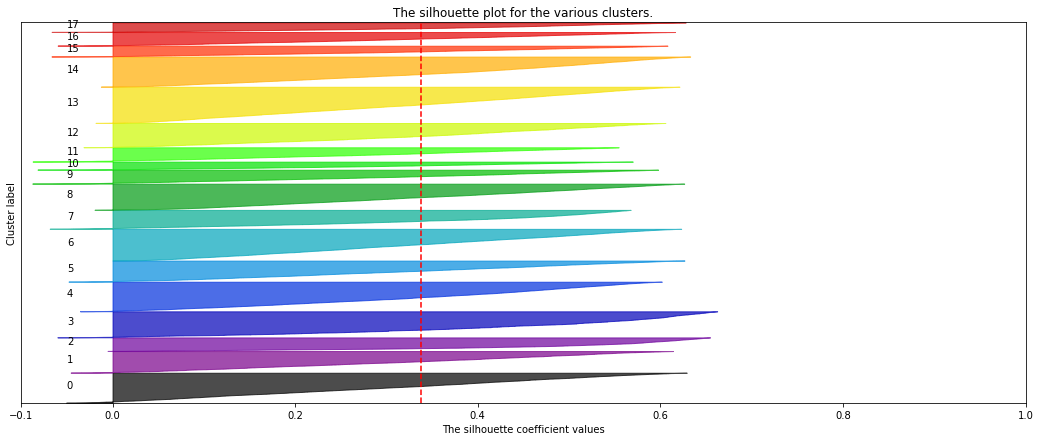

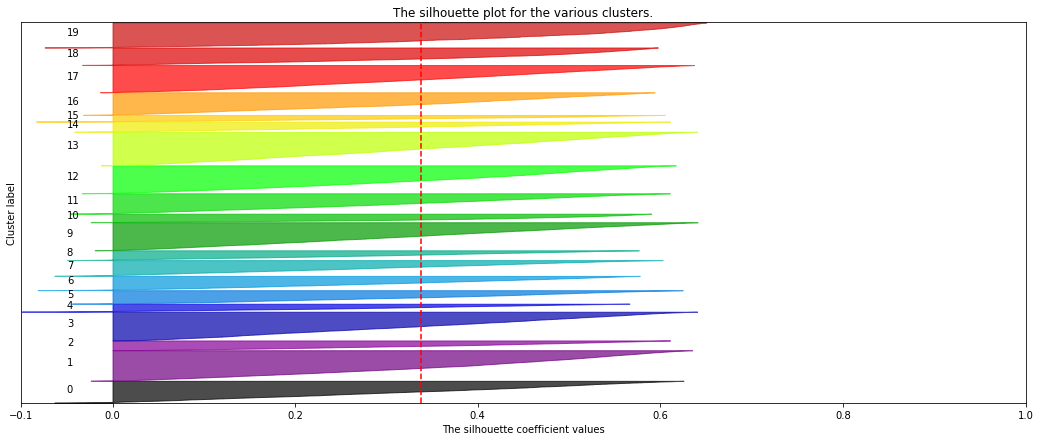

In [74]:
plotSilhouetteGraph()

## K Means Algorithm to cluster the data with K-means++ to initialize the centroid

## We have used K- means algorithm as it is fast and efficient and as the data is huge K-means will perform efficiently in compare to other algorithm. Also it tries to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares [4]. However K-means is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. So we needed a more effcient way to initialize the centroids rather than random initialization.

## We researched and found that  K-means++ solves this issue initializes the centroids to be (generally) distant from each other, leading to provably better than random initialization [5].

In [94]:
# function for creating model for K-means clustering using K-means++ centroid initialization
def clusterData(kcluster):
    number_of_cluster = kcluster
    model = KMeans(n_clusters=number_of_cluster, init='k-means++', max_iter=100, n_init=1)
    return model

In [95]:
clusteringModel=clusterData(10)

In [96]:
# Function to create clusters for documents
def predictClusterID(model,X_train_tfidf):
    y_predicted = model.fit_predict(X_train_tfidf)
    return y_predicted

In [97]:
# Assigning Cluster Id for each document to know which document belongs to which cluster  
ClusterID = predictClusterID(clusteringModel,X_train_tfidf)
doc_df['cluster']=ClusterID

In [98]:
doc_df

,itemid,headline,text,date,XMLfilename,bip,cluster
0,432107,"Detroit gunman killed after he kills 3, wounds 2.","[recit, lord, prayer, fire, shotgun, man, dres...",1997-03-11,432107newsML.xml,GCAT,9
1,432108,COMMISSION ADOPTS MEMORANDUM ON WORKERS RIGHTS...,"[commiss, paragraph, mediumterm, social, actio...",1997-03-11,432108newsML.xml,E41,7
2,432109,REUTER EC REPORT LONG-TERM DIARY (PAGE 6/10 - ...,"[ec, report, longterm, diari, page, june, wedn...",1997-03-11,432109newsML.xml,G15,8
3,432110,REUTER EC REPORT LONG-TERM DIARY (PAGE 2/10 - ...,"[ec, report, longterm, diari, page, apr, may, ...",1997-03-11,432110newsML.xml,G15,8
4,432111,REUTER EC REPORT LONG-TERM DIARY FOR MARCH 17-...,"[highlightsamsterdam, netherland, host, summit...",1997-03-11,432111newsML.xml,G15,8
5,432112,OFFICIAL JOURNAL CONTENTS - OJ C 75 OF MARCH 1...,"[note, content, display, revers, order, print,...",1997-03-11,432112newsML.xml,G15,8
6,432113,OFFICIAL JOURNAL CONTENTS - OJ C 76 OF MARCH 1...,"[note, content, display, revers, order, print,...",1997-03-11,432113newsML.xml,G15,7
7,432114,"Canada T-bill auction averages, historical rates.","[mo, mo, yr, brate, c, yr, dlr, tse, note, feb...",1997-03-11,432114newsML.xml,M12,4
8,432115,Canadian key economic indicators.,"[indic, period, latest, prev, prev, nextunempl...",1997-03-11,432115newsML.xml,E71,5
9,432116,RESEARCH ALERT - Goldman starts Canadian oils.,"[goldman, sach, said, initi, coverag, suncor, ...",1997-03-11,432116newsML.xml,C15,2


In [88]:
#Finding the top 10 terms of each cluster
def termsPerCluster(model,vectorizer):
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(10):
     print('\033[1m' + "Cluster %d: " % i + '\033[0m'),
     for ind in order_centroids[i, :10]:
         print('%s' % terms[ind])

## As it can seen from the terms of each cluster that the clusters have been well formed. The words which relate to each other are grouped in one cluster as it is evident from the terms displayed.

In [89]:
termsPerCluster(clusteringModel,vectorizer)

Cluster 0: 
match
play
cup
second
game
team
beat
win
leagu
score
Cluster 1: 
bond
municip
coupon
date
moodi
sale
desk
issuer
price
sp
Cluster 2: 
bank
rate
percent
said
market
dollar
central
billion
bond
dealer
Cluster 3: 
share
stock
percent
said
index
market
trade
close
point
million
Cluster 4: 
said
minist
govern
presid
state
offici
parti
peopl
countri
say
Cluster 5: 
net
profit
incom
loss
shr
share
dividend
unless
oper
million
Cluster 6: 
yen
latest
forecast
specifi
million
quarterli
prior
yearago
unless
actual
Cluster 7: 
pct
price
lb
march
mar
feb
na
jan
week
percent
Cluster 8: 
tonn
cent
trader
oil
price
said
wheat
export
market
crude
Cluster 9: 
said
compani
million
percent
year
billion
group
new
product
sale


In [109]:
# Function to create dataframe for each individual cluster.
cluster_df_list = []
cluster_number=[0,1,2,3,4,5,6,7,8,9]
def createIndividualClusterDF(dataframe):
    for cluster_df in (cluster_number):
        cluster_df_list.append(dataframe[dataframe.cluster==cluster_df])

    len(cluster_df_list)

In [110]:
createIndividualClusterDF(doc_df)

In [111]:

doc_df

,itemid,headline,text,date,XMLfilename,bip,cluster
0,432107,"Detroit gunman killed after he kills 3, wounds 2.","[recit, lord, prayer, fire, shotgun, man, dres...",1997-03-11,432107newsML.xml,GCAT,9
1,432108,COMMISSION ADOPTS MEMORANDUM ON WORKERS RIGHTS...,"[commiss, paragraph, mediumterm, social, actio...",1997-03-11,432108newsML.xml,E41,7
2,432109,REUTER EC REPORT LONG-TERM DIARY (PAGE 6/10 - ...,"[ec, report, longterm, diari, page, june, wedn...",1997-03-11,432109newsML.xml,G15,8
3,432110,REUTER EC REPORT LONG-TERM DIARY (PAGE 2/10 - ...,"[ec, report, longterm, diari, page, apr, may, ...",1997-03-11,432110newsML.xml,G15,8
4,432111,REUTER EC REPORT LONG-TERM DIARY FOR MARCH 17-...,"[highlightsamsterdam, netherland, host, summit...",1997-03-11,432111newsML.xml,G15,8
5,432112,OFFICIAL JOURNAL CONTENTS - OJ C 75 OF MARCH 1...,"[note, content, display, revers, order, print,...",1997-03-11,432112newsML.xml,G15,8
6,432113,OFFICIAL JOURNAL CONTENTS - OJ C 76 OF MARCH 1...,"[note, content, display, revers, order, print,...",1997-03-11,432113newsML.xml,G15,7
7,432114,"Canada T-bill auction averages, historical rates.","[mo, mo, yr, brate, c, yr, dlr, tse, note, feb...",1997-03-11,432114newsML.xml,M12,4
8,432115,Canadian key economic indicators.,"[indic, period, latest, prev, prev, nextunempl...",1997-03-11,432115newsML.xml,E71,5
9,432116,RESEARCH ALERT - Goldman starts Canadian oils.,"[goldman, sach, said, initi, coverag, suncor, ...",1997-03-11,432116newsML.xml,C15,2


In [101]:
# defined function to extract features from individual clusters
def featureslabelsExtraction(dataframe): 
    textList = []
    new_df = dataframe

    new_df = new_df.drop(['itemid', 'headline', 'date','XMLfilename'], axis=1)
    for text in new_df['text']:
        text = ' '.join(text)
        textList.append(text)
    
    #if-idf Vectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    vec = TfidfVectorizer(min_df = 0.01,
    max_df = 0.8,
    stop_words = 'english')
    
    #feature data
    feature_data=vec.fit_transform(textList)
    
    #encoding labels 
    labelencoder = preprocessing.LabelEncoder()
    #label data
    labels = labelencoder.fit_transform(dataframe['bip']) 
    
    return feature_data,labels
    


## We have used train test split method because the amount of time required for training will be lower than Cross Validation. Also, this is helpful as we have computational constraints and the dataset is large and using cross validation for every cluster would require high computational power. We have used random state parameter so that data will be choosen randomly so that model won't just learn certain cases. 

In [102]:
#splitting train set and test set
def trainModel(feature_data, labels):
    train_features, test_features, train_labels, test_labels = train_test_split(feature_data, labels , test_size = 0.25, random_state = 42)
    
    return train_features, test_features, train_labels, test_labels

In [103]:
#Function that takes features and labels and return a trained classifier
def getClassifier(model,train_features,train_labels):
    model = model.fit(train_features,train_labels)
    return model 

 ## We have used confusion matrix and accuracy score to evaluate quality of my classifier as confusion matrix gives complete picture of how the classifer is performing. It gives deep insight not only into errors but also the type of errors that is being made by the classifier. Using confusion matrix we have evaluate accuracy score, sensitivity and specificity of the model to find how accurate the model is, how sensitive is the classifier in detecting positive instances and how specific is the model in predicitng positive instances. 

In [104]:
# Function to evaluate classifier to see how it performed on the data
def evaluateClassifier(model,test_features,test_labels):
    
    y_pred= model.predict(test_features)
    accuracy=accuracy_score(test_labels, y_pred)
    confusion=confusion_matrix(test_labels, y_pred) #finding confusion matrix
    
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    sensitivity = TP / float(FN + TP)
    specificity = TN / (TN + FP)
    
    return accuracy,sensitivity,specificity 

## We have used MultiLayer Perceptron (Neural Network) classifier to classify data as have the ability to learn and model non-linear and complex relationships, which is really important as we had non-linear relationship with the text data and the labels. Given a set of features a target, it can learn a non-linear function approximator for either classification or regression. Also, it performs well for any given any amount of data [6]. Also, it would help to capture important patterns and distill non important feature to predict better. Moreover, we wanted to see a fair comparison before and after extracting features using autoencoder and a deep learning model. Thus using neural network before would give a good idea on how autoencoder performs to extract features and improving accuracy as we have to use a deep learning model after extracting features from autoencoder.

In [105]:
# Function to train using MLP classifier and find out how it performed
def neuralNetwork(feature_data,labels):
    train_features, test_features, train_labels, test_labels = trainModel(feature_data, labels)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,15), random_state=1,max_iter=100)
    trained_model = getClassifier(clf,train_features,train_labels)

    model_accuracy_score,model_sensitivity,model_specificity=evaluateClassifier(trained_model,test_features,test_labels)
    print('\033[1m'+"Accuracy"+'\033[0m',model_accuracy_score)
    print('\033[1m'+"Sensitivity"+'\033[0m',model_sensitivity)
    print('\033[1m'+"Specificity"+'\033[0m',model_specificity)
    print()
    print()
    print()

In [106]:
#Function to extract fetaures and run a classifer on it
def genrateCLassifier(dataframe):
    feature_data,labels = featureslabelsExtraction(dataframe)
    neuralNetwork(feature_data,labels)

## We have made this program dynamic which extracts features and uses MLP classifier on each individual cluster and prints each individual cluster's model accuracy, sensitivity and specificity. As it can be seen below for each cluster number of documents per cluster is printed and MPL classfier is used on it to find out its aacuracy. As we have selected 10 clusters there are 10 outputs which shows each individual cluster's model performance. 

In [113]:
cluster_number=[0,1,2,3,4,5,6,7,8,9]
cluster_accuracy = []
for y in cluster_number:
    df =cluster_df_list[y]
    range =(df.shape[0])
    print ('\033[1m'+'Cluster number -  '+'\033[0m' + str(y) +'\033[1m'+ '   number of documents per cluster - '+'\033[0m'+str(range) )
    genrateCLassifier(df)
    cluster_accuracy.append((acc))

Cluster number -  0   number of documents per cluster - 2647


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


Accuracy 0.850453172205438
Sensitivity nan
Specificity nan



Cluster number -  1   number of documents per cluster - 7180
Accuracy 0.5983286908077995
Sensitivity 1.0
Specificity 0.0



Cluster number -  2   number of documents per cluster - 4434


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Accuracy 0.7754733994589721
Sensitivity nan
Specificity 1.0



Cluster number -  3   number of documents per cluster - 2857


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


Accuracy 0.9818181818181818
Sensitivity 0.9985754985754985
Specificity nan



Cluster number -  4   number of documents per cluster - 3249
Accuracy 0.5682656826568265
Sensitivity 0.3333333333333333
Specificity 1.0



Cluster number -  5   number of documents per cluster - 2746


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Accuracy 0.8879184861717613
Sensitivity nan
Specificity 0.0



Cluster number -  6   number of documents per cluster - 1262
Accuracy 0.680379746835443
Sensitivity 1.0
Specificity 0.5



Cluster number -  7   number of documents per cluster - 12159
Accuracy 0.5634868421052631
Sensitivity 1.0
Specificity 0.0



Cluster number -  8   number of documents per cluster - 6118


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


Accuracy 0.665359477124183
Sensitivity nan
Specificity nan



Cluster number -  9   number of documents per cluster - 3030
Accuracy 0.9366754617414248
Sensitivity nan
Specificity nan





D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


## As it can be seen from the above result that the classifier didn't had good results as there were many fetaures as it was a text data and the model generated became very complex which lead to bad performance of the model. Some of the classifier seems to underfit and some of them seems to overfit.

In [99]:
# function to measure quality of cluster
def clusterQuality(X,labels, kmlabels):
    print("Davies Bouldin Score: %0.3f" %davies_bouldin_score(X, kmlabels))
    print("Silhouette Coefficient: %0.3f" %silhouette_score(X, kmlabels))

## We have used Davies Bouldin Score and Silhouette Coefficient to measure the quality of cluster as one will tell how good the cluster are formed and other will tell well assigned the points are in the cluster 
## 1. Davies Bouldin Score : We have used this metric as it captures the intuition that clusters that are (1) well-spaced from each other and (2) themselves very dense are likely a ‘good’ clustering. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering. As it can be seen from the result of the score which is 0.236 which is closer to 0 that the clusters formed are well spaced from each other and less dispersed. Thus, it can be said that different documents are nicely clustered and less dispersed [7].
## 2. Silhouette Coefficient : We have used this metric as tells us how well-assigned each individual point. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. As it can be observed from our score it is close to 1 which indicates the samples are well assigned to individual clusters and are not falling between two clusters [8]. 



In [100]:
clusterlabels = model.labels_
clusterQuality(X_train_tfidf,doc_df['bip'],clusterlabels)

Davies Bouldin Score: 0.236
Silhouette Coefficient: 0.6882782239819362


## As it can be seen the classifier have not performed well on the perviously extracted features from the data using TF-IDF vectorizer. So we decided to implement a better way to extract features from the data. We have used research paper number 3 from the given papers which explain the use of autoencoder to extract features from multidimensional raw data [9]. Autoencoder helps to address the problem of normal machine learning models which do not perform well with high dimensional data like text data. Moreover, normal machine learning model may be difficult to scale and prone to information loss, affecting the effectiveness and maintainability.  As we had text data which has large set of multidimensional features so we have used this method to solve the problem of normal classifiers. Autoencoders helps to reduce the dimensionaity of the features and as we have huge text data it would be useful to extract only features which are valaubale for the classification process. Autoencoder encodes the features and converts them to numeric values by using a parametrized function.

In [115]:
# function to use autoencoder to extract features 
def auto_encoder(feature_data, labels, column_value):
    train_features, test_features, train_labels, test_labels = trainModel(feature_data, labels)
    encoding_text = int(column_value/2)
    # this is our input placeholder
    input_text = Input(shape=(column_value,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_text, activation='relu')(input_text)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(column_value, activation='sigmoid')(encoded)
    # this model maps an input to its reconstruction
    autoencoder = Model(input_text, decoded)
    encoder = Model(input_text, encoded)
    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_text,))
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # create the decoder model
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    autoencoder.fit(train_features, train_features,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_features, test_features))
    
    return encoder,decoder


## We have used a Deep Learning model called Sequential Model as they give the best result with unstructured data and as we had text data we wanted to see good it really is. It also does not requires data to be labeled and reduces unncessary cost. Also it reduces the need for feature engineering, one of the most time-consuming parts of machine learning practice. Thus we wanted to see how good it performs with the autoencoder and we expected to see good result by combining both these techniques.

In [120]:
# Function to use sequantial deep learning model to classify the documents 
def Sequential_model(encoded_imgs, labels, column_value):
    train_features, test_features, train_labels, test_labels = trainModel(encoded_imgs, labels )
    train_labels = utils.to_categorical(train_labels, 103)
    test_labels = utils.to_categorical(test_labels, 103)
    model_mc = Sequential()
    #add model layers
    i_shape = int(column_value/2)
    model_mc.add(Dense(256, activation='relu', input_shape=(i_shape,)))
    model_mc.add(Dense(226, activation='relu'))
    model_mc.add(Dense(256, activation='relu'))
    model_mc.add(Dense(103))

    #compile model using mse as a measure of model performance
    model_mc.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    early_stopping_monitor = EarlyStopping(patience=3)
    #train model
    history = model_mc.fit(train_features, train_labels, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    score=model_mc.evaluate(test_features,test_labels)
    print(score)
    print()
    print()
    print()
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    print()
    print()
    print()
    print()

In [121]:
# Function to train deep learning model and evaluate its performance
def generateDeepNeuralNetworkModel(df):
    #cluster_df =cluster_df_list[]
    cluster_feature,cluster_labels = featureslabelsExtraction(df)
    column = cluster_feature.shape[1]
    encoder,decoder = auto_encoder(cluster_feature,cluster_labels,column)
    encoded_imgs = encoder.predict(cluster_feature)
    Sequential_model(encoded_imgs, cluster_labels,column)

In [122]:
cluster_number=[0,1,2,3,4,5,6,7,8,9]
new_cluster_accuracy = []

Train on 1985 samples, validate on 662 samples
Epoch 1/50
1985/1985 [==============================] - 1s 349us/step - loss: 0.6762 - val_loss: 0.6343
Epoch 2/50
1985/1985 [==============================] - 1s 317us/step - loss: 0.5617 - val_loss: 0.4319
Epoch 3/50
1985/1985 [==============================] - 1s 326us/step - loss: 0.3192 - val_loss: 0.1783
Epoch 4/50
1985/1985 [==============================] - 1s 313us/step - loss: 0.1200 - val_loss: 0.0642
Epoch 5/50
1985/1985 [==============================] - 1s 303us/step - loss: 0.0513 - val_loss: 0.0395
Epoch 6/50
1985/1985 [==============================] - 1s 303us/step - loss: 0.0377 - val_loss: 0.0353
Epoch 7/50
1985/1985 [==============================] - 1s 311us/step - loss: 0.0353 - val_loss: 0.0346
Epoch 8/50
1985/1985 [==============================] - 1s 333us/step - loss: 0.0346 - val_loss: 0.0341
Epoch 9/50
1985/1985 [==============================] - 1s 327us/step - loss: 0.0341 - val_loss: 0.0337
Epoch 10/50
1985/

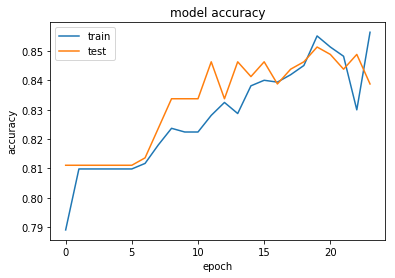





Train on 5385 samples, validate on 1795 samples
Epoch 1/50
5385/5385 [==============================] - 2s 345us/step - loss: 0.5566 - val_loss: 0.2330
Epoch 2/50
5385/5385 [==============================] - 2s 319us/step - loss: 0.0910 - val_loss: 0.0367
Epoch 3/50
5385/5385 [==============================] - 2s 323us/step - loss: 0.0352 - val_loss: 0.0347
Epoch 4/50
5385/5385 [==============================] - 2s 391us/step - loss: 0.0342 - val_loss: 0.0339
Epoch 5/50
5385/5385 [==============================] - 2s 415us/step - loss: 0.0335 - val_loss: 0.0334
Epoch 6/50
5385/5385 [==============================] - 2s 371us/step - loss: 0.0332 - val_loss: 0.0332
Epoch 7/50
5385/5385 [==============================] - 2s 420us/step - loss: 0.0329 - val_loss: 0.0329
Epoch 8/50
5385/5385 [==============================] - 2s 388us/step - loss: 0.0327 - val_loss: 0.0327
Epoch 9/50
5385/5385 [==============================] - 2s 337us/step - loss: 0.0325 - val_loss: 0.0325
Epoch 10/50


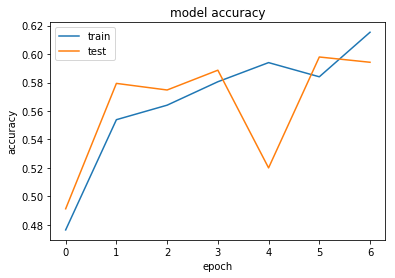





Train on 3325 samples, validate on 1109 samples
Epoch 1/50
3325/3325 [==============================] - 1s 375us/step - loss: 0.6445 - val_loss: 0.5154
Epoch 2/50
3325/3325 [==============================] - 1s 417us/step - loss: 0.3075 - val_loss: 0.1111
Epoch 3/50
3325/3325 [==============================] - 1s 423us/step - loss: 0.0621 - val_loss: 0.0391
Epoch 4/50
3325/3325 [==============================] - 1s 431us/step - loss: 0.0375 - val_loss: 0.0363
Epoch 5/50
3325/3325 [==============================] - 1s 384us/step - loss: 0.0365 - val_loss: 0.0356
Epoch 6/50
3325/3325 [==============================] - 1s 372us/step - loss: 0.0357 - val_loss: 0.0348
Epoch 7/50
3325/3325 [==============================] - 1s 364us/step - loss: 0.0350 - val_loss: 0.0343
Epoch 8/50
3325/3325 [==============================] - 1s 371us/step - loss: 0.0345 - val_loss: 0.0339
Epoch 9/50
3325/3325 [==============================] - 1s 402us/step - loss: 0.0342 - val_loss: 0.0336
Epoch 10/50


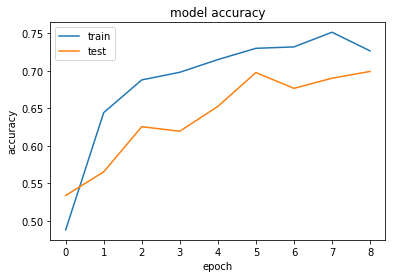





Train on 2142 samples, validate on 715 samples
Epoch 1/50
2142/2142 [==============================] - 0s 87us/step - loss: 0.6808 - val_loss: 0.6588
Epoch 2/50
2142/2142 [==============================] - 0s 45us/step - loss: 0.6334 - val_loss: 0.5863
Epoch 3/50
2142/2142 [==============================] - 0s 46us/step - loss: 0.5390 - val_loss: 0.4600
Epoch 4/50
2142/2142 [==============================] - 0s 45us/step - loss: 0.3969 - val_loss: 0.3047
Epoch 5/50
2142/2142 [==============================] - 0s 46us/step - loss: 0.2485 - val_loss: 0.1779
Epoch 6/50
2142/2142 [==============================] - 0s 48us/step - loss: 0.1454 - val_loss: 0.1092
Epoch 7/50
2142/2142 [==============================] - 0s 48us/step - loss: 0.0953 - val_loss: 0.0813
Epoch 8/50
2142/2142 [==============================] - 0s 47us/step - loss: 0.0759 - val_loss: 0.0709
Epoch 9/50
2142/2142 [==============================] - 0s 46us/step - loss: 0.0686 - val_loss: 0.0668
Epoch 10/50
2142/2142 

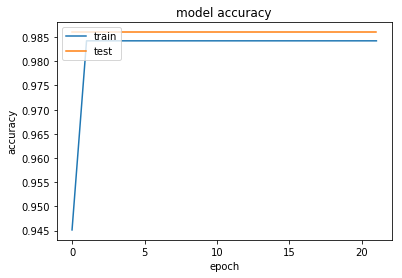





Train on 2436 samples, validate on 813 samples
Epoch 1/50
2436/2436 [==============================] - 1s 371us/step - loss: 0.6663 - val_loss: 0.5966
Epoch 2/50
2436/2436 [==============================] - 1s 334us/step - loss: 0.4797 - val_loss: 0.2973
Epoch 3/50
2436/2436 [==============================] - 1s 336us/step - loss: 0.1850 - val_loss: 0.0818
Epoch 4/50
2436/2436 [==============================] - 1s 329us/step - loss: 0.0567 - val_loss: 0.0386
Epoch 5/50
2436/2436 [==============================] - 1s 337us/step - loss: 0.0357 - val_loss: 0.0335
Epoch 6/50
2436/2436 [==============================] - 1s 340us/step - loss: 0.0332 - val_loss: 0.0328
Epoch 7/50
2436/2436 [==============================] - 1s 343us/step - loss: 0.0327 - val_loss: 0.0325
Epoch 8/50
2436/2436 [==============================] - 1s 333us/step - loss: 0.0322 - val_loss: 0.0321
Epoch 9/50
2436/2436 [==============================] - 1s 332us/step - loss: 0.0318 - val_loss: 0.0318
Epoch 10/50
2

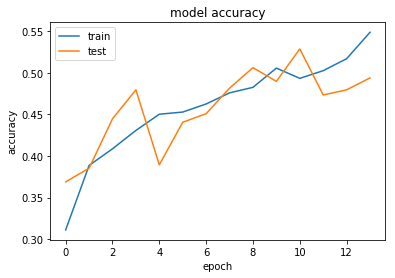





Train on 2059 samples, validate on 687 samples
Epoch 1/50
2059/2059 [==============================] - 0s 215us/step - loss: 0.6778 - val_loss: 0.6400
Epoch 2/50
2059/2059 [==============================] - 0s 168us/step - loss: 0.5917 - val_loss: 0.4921
Epoch 3/50
2059/2059 [==============================] - 0s 167us/step - loss: 0.4058 - val_loss: 0.2718
Epoch 4/50
2059/2059 [==============================] - 0s 174us/step - loss: 0.1999 - val_loss: 0.1164
Epoch 5/50
2059/2059 [==============================] - 0s 176us/step - loss: 0.0876 - val_loss: 0.0597
Epoch 6/50
2059/2059 [==============================] - 0s 177us/step - loss: 0.0520 - val_loss: 0.0445
Epoch 7/50
2059/2059 [==============================] - 0s 171us/step - loss: 0.0425 - val_loss: 0.0403
Epoch 8/50
2059/2059 [==============================] - 0s 173us/step - loss: 0.0397 - val_loss: 0.0388
Epoch 9/50
2059/2059 [==============================] - 0s 173us/step - loss: 0.0385 - val_loss: 0.0379
Epoch 10/50
2

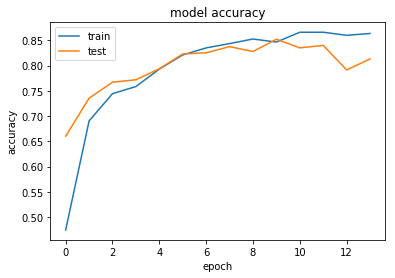





Train on 946 samples, validate on 316 samples
Epoch 1/50
946/946 [==============================] - 0s 434us/step - loss: 0.6892 - val_loss: 0.6785
Epoch 2/50
946/946 [==============================] - 0s 346us/step - loss: 0.6685 - val_loss: 0.6430
Epoch 3/50
946/946 [==============================] - 0s 345us/step - loss: 0.6210 - val_loss: 0.5708
Epoch 4/50
946/946 [==============================] - 0s 376us/step - loss: 0.5340 - val_loss: 0.4574
Epoch 5/50
946/946 [==============================] - 0s 363us/step - loss: 0.4103 - val_loss: 0.3210
Epoch 6/50
946/946 [==============================] - 0s 364us/step - loss: 0.2760 - val_loss: 0.1975
Epoch 7/50
946/946 [==============================] - 0s 350us/step - loss: 0.1653 - val_loss: 0.1134
Epoch 8/50
946/946 [==============================] - 0s 357us/step - loss: 0.0952 - val_loss: 0.0685
Epoch 9/50
946/946 [==============================] - 0s 368us/step - loss: 0.0599 - val_loss: 0.0480
Epoch 10/50
946/946 [===========

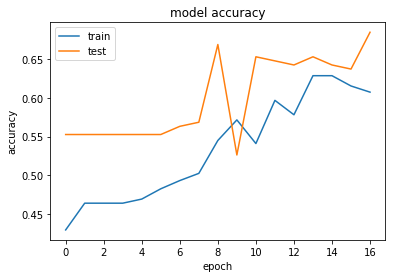





Train on 9119 samples, validate on 3040 samples
Epoch 1/50
9119/9119 [==============================] - 4s 452us/step - loss: 0.3739 - val_loss: 0.0409
Epoch 2/50
9119/9119 [==============================] - 4s 443us/step - loss: 0.0306 - val_loss: 0.0288
Epoch 3/50
9119/9119 [==============================] - 4s 427us/step - loss: 0.0282 - val_loss: 0.0279
Epoch 4/50
9119/9119 [==============================] - 4s 440us/step - loss: 0.0274 - val_loss: 0.0273
Epoch 5/50
9119/9119 [==============================] - 4s 441us/step - loss: 0.0269 - val_loss: 0.0269
Epoch 6/50
9119/9119 [==============================] - 4s 477us/step - loss: 0.0265 - val_loss: 0.0265
Epoch 7/50
9119/9119 [==============================] - 4s 464us/step - loss: 0.0262 - val_loss: 0.0262
Epoch 8/50
9119/9119 [==============================] - 4s 437us/step - loss: 0.0259 - val_loss: 0.0259
Epoch 9/50
9119/9119 [==============================] - 4s 432us/step - loss: 0.0256 - val_loss: 0.0257
Epoch 10/50


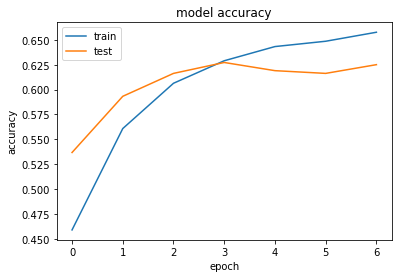





Train on 4588 samples, validate on 1530 samples
Epoch 1/50
4588/4588 [==============================] - 4s 786us/step - loss: 0.5585 - val_loss: 0.2294
Epoch 2/50
4588/4588 [==============================] - 3s 730us/step - loss: 0.0754 - val_loss: 0.0278
Epoch 3/50
4588/4588 [==============================] - 3s 732us/step - loss: 0.0285 - val_loss: 0.0287
Epoch 4/50
4588/4588 [==============================] - 3s 744us/step - loss: 0.0284 - val_loss: 0.0275
Epoch 5/50
4588/4588 [==============================] - 4s 768us/step - loss: 0.0272 - val_loss: 0.0267
Epoch 6/50
4588/4588 [==============================] - 3s 752us/step - loss: 0.0266 - val_loss: 0.0264
Epoch 7/50
4588/4588 [==============================] - 4s 773us/step - loss: 0.0264 - val_loss: 0.0262
Epoch 8/50
4588/4588 [==============================] - 3s 756us/step - loss: 0.0262 - val_loss: 0.0262
Epoch 9/50
4588/4588 [==============================] - 3s 718us/step - loss: 0.0261 - val_loss: 0.0261
Epoch 10/50


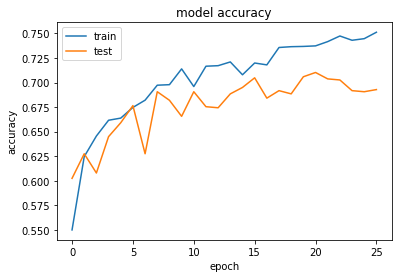





Train on 2272 samples, validate on 758 samples
Epoch 1/50
2272/2272 [==============================] - 3s 1ms/step - loss: 0.6637 - val_loss: 0.5778
Epoch 2/50
2272/2272 [==============================] - 2s 945us/step - loss: 0.4080 - val_loss: 0.1876
Epoch 3/50
2272/2272 [==============================] - 2s 964us/step - loss: 0.0914 - val_loss: 0.0362
Epoch 4/50
2272/2272 [==============================] - 2s 904us/step - loss: 0.0294 - val_loss: 0.0274
Epoch 5/50
2272/2272 [==============================] - 2s 910us/step - loss: 0.0280 - val_loss: 0.0282
Epoch 6/50
2272/2272 [==============================] - 2s 996us/step - loss: 0.0287 - val_loss: 0.0281
Epoch 7/50
2272/2272 [==============================] - 2s 879us/step - loss: 0.0283 - val_loss: 0.0275
Epoch 8/50
2272/2272 [==============================] - 2s 1ms/step - loss: 0.0275 - val_loss: 0.0268
Epoch 9/50
2272/2272 [==============================] - 2s 845us/step - loss: 0.0268 - val_loss: 0.0263
Epoch 10/50
2272/

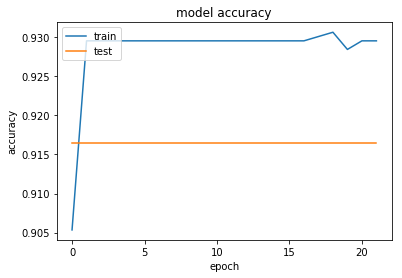

In [124]:
for x in cluster_number:
    cluster_df = cluster_df_list[x]
    generateDeepNeuralNetworkModel(cluster_df)
    new_cluster_accuracy.append(score[1])
    

## We have plot a comparison graph to see how well the autoencoder and deep learning model worked against the normal machine learning model. As it can be visualize from the graph that for every cluster the new autoencoder technique and deep learning model have outperformed the previous machine learning model. The accuracy has been improved after using autoencoder.

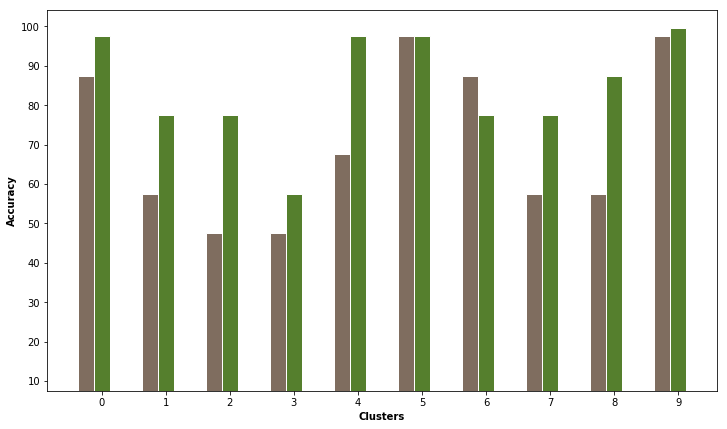

In [17]:
# Plotting Comparison graph of accuracy

cluster_id = [0,1,2,3,4,5,6,7,8,9]
accuracy=[10,20,30,40,50,60,70,80,90,100]


plt.figure(figsize=(12,7))
barWidth = 0.25

r1 = np.arange(len(values1))
r2 = [x + barWidth for x in r1]

plt.bar(r1,cluster_accuracy, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, new_cluster_accuracy, color='#557f2d', width=barWidth, edgecolor='white', label='var2')

plt.xlabel('Clusters', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(cluster_accuracy))], names)
plt.yticks([r + barWidth for r in range(len(cluster_accuracy))], accuracy)



plt.show()


In [ ]:
References

[1] Li-Ping Jing, Hou-Kuan Huang, and Hong-Bo Shi. Improved feature selection approach TFIDF in text mining. In Proceedings. International Conference on Machine Learning and Cybernetics. https://doi.org/10.1109/icmlc.2002.1174522 
[2] Peter J. Rousseeuw. 1987. Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics 20: 53–65. https://doi.org/10.1016/0377-0427(87)90125-7 
[3] sklearn.metrics.silhouette_score — scikit-learn 0.22 documentation. (2019). Retrieved 12 December 2019, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
[4] 2.3. Clustering — scikit-learn 0.22 documentation. (2019). Retrieved 12 December 2019, from https://scikit-learn.org/stable/modules/clustering.html#k-means
[5] k-means++: The advantages of careful seeding” Arthur, David, and Sergei Vassilvitskii, Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, Society for Industrial and Applied Mathematics (2007)
[6] 1.17. Neural network models (supervised) — scikit-learn 0.22 documentation. (2019). Retrieved 12 December 2019, from https://scikit-learn.org/stable/modules/neural_networks_supervised.html
[7] Davies, David L.; Bouldin, Donald W. (1979). “A Cluster Separation Measure”. IEEE Transactions on Pattern Analysis and Machine Intelligence. PAMI-1 (2): 224-227
[8] Peter J. Rousseeuw (1987). “Silhouettes: a Graphical Aid to the Interpretation and Validation of Cluster Analysis”. Computational and Applied Mathematics 20: 53-65.
[9] Maggipinto, M., Masiero, C., Beghi, A., & Susto, G. A. (2018). A Convolutional Autoencoder Approach for Feature Extraction in Virtual Metrology: Paper ID 259. Procedia Manufacturing, 17, 126-133.        